# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question.
- Show all code necessary for the analysis, but remove superfluous code

---
## 1

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), build a linear regression model to predict *reaction time* based on all the other variables. 

<ul>
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous variables   
<li> b) check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and specifically what you see for this model.
<li> c) check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> d) plot the actual vs. predicted reaction times, as well as print out the mean absolute error and $R^2$ for your model for both <it>train</it> and <it>test</it>. How well did your model do based on these metrics, and how can you tell?
<li> e) is your model overfit? How can you tell?
<li> f) make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient).
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [14]:
# import necessary packages
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [15]:
#import df and drop null
data = pd.read_csv('./reactionTime.csv')
data = data.dropna()

In [16]:
#split data into train and test data
predictors = ['age','boredom_rating','risk_propensity','height','left_handed']
removelh = ['age','boredom_rating','risk_propensity','height']
X = data[predictors]
y = data['reaction_time']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
#set zscore for all values except left_handed
zScore = StandardScaler()
X_train = X_train.copy()
Xz_train = X_train[removelh]
Xz_train=zScore.fit_transform(Xz_train.values)
X_train.loc[:,removelh] = Xz_train

X_test = X_test.copy()
Xz_test = X_test[removelh]
Xz_test=zScore.fit_transform(Xz_test.values)
X_test.loc[:,removelh] = Xz_test

In [18]:
lr = LinearRegression()

In [19]:
#fit model using training predictors and training actuals
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
#predict the actuals using lr
#add residual and predicted values into a df
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
assump = pd.DataFrame({'residual':y_test-test_pred, 'predicted': test_pred, 'actual': y_test})

<H2> Linearity and Homoskedasticity</H2>

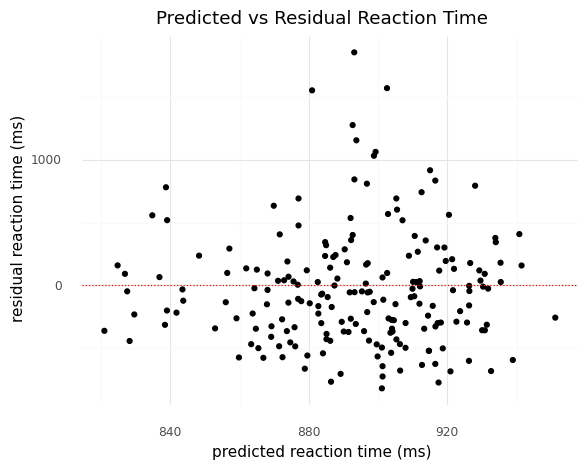

<ggplot: (141991860628)>

In [21]:
(ggplot(assump, aes(x='predicted',y ='residual'))+
 geom_point()+
 theme_minimal()+
 labs(x='predicted reaction time (ms)',y='residual reaction time (ms)',title='Predicted vs Residual Reaction Time')+
 geom_hline(yintercept=0,color='red', linetype='dotted'))

This graph shows the predicted values vs the residuals. 
<ul>
<li>This graph can determine linearity because as the points do not obviously show a non linear pattern. Since the points are an amorphous blob of points, the data is assumed to be linear.</li>

<li>The homoskedasticity also seems to be okay in this model because the points are evenly spread around the 0 residual with not many obvious deviation.</li>
</ul>

<H2>Actual vs Predicted Graph</H2>

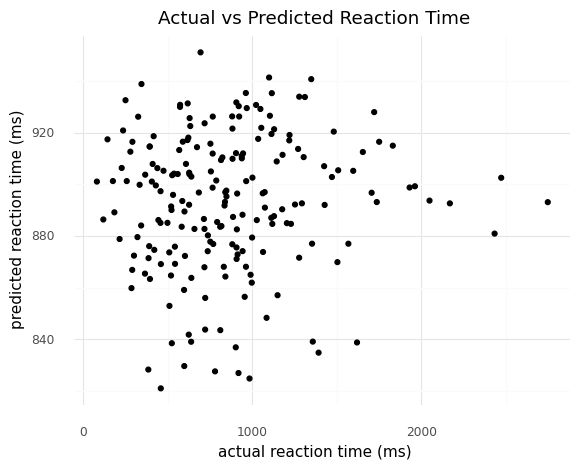

<ggplot: (141993119476)>

In [22]:
(ggplot(assump, aes(x='actual',y='predicted'))+
 geom_point()+theme_minimal()+
 labs(x='actual reaction time (ms)',y='predicted reaction time (ms)',title='Actual vs Predicted Reaction Time'))

<H2>R2 Data and MAE</H2>

In [23]:
print('testr2:', lr.score(X_test,y_test))
print('trainr2:', lr.score(X_train,y_train))

testr2: -2.321485367828835e-05
trainr2: 0.00271127854621922


In [24]:
print('mean absolute error for test:', np.array(np.absolute(y_test-test_pred)).mean())
print('mean absolute error for training:', np.array(np.absolute(y_train-train_pred)).mean())

mean absolute error for test: 346.49084350580875
mean absolute error for training: 375.71735661099797


It seems like the model didn't find an obvious relationship between the predictor variables and reaction speed. There was quite a bit of mean absolute error as well which determines the spread from the predicted the points.

Overfit or not?

The model is not overfit because it performs similarly to both the test and training data as seen in the mean absolute errors.

<H2>Coef Data</H2>

In [25]:
coef = pd.DataFrame({'name':predictors,'coef':lr.coef_})
coef.head()

,name,coef
0,age,5.921473
1,boredom_rating,-19.416452
2,risk_propensity,6.466033
3,height,9.071081
4,left_handed,-39.700484


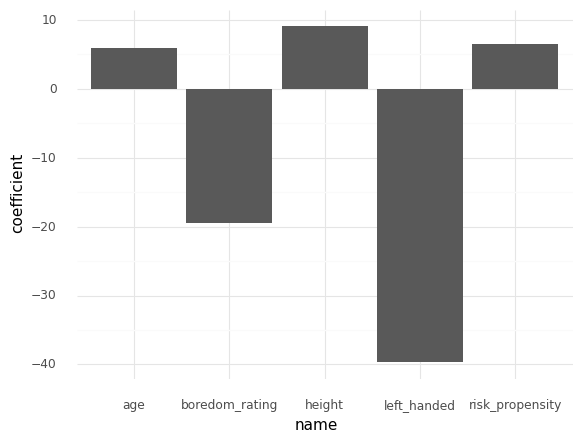

<ggplot: (141993152172)>

In [26]:
(ggplot(coef,aes(x='name',y='coef'))+geom_bar(stat='identity')+theme_minimal()+ylab('coefficient'))